In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Sasaran kita adalah
1.memngonfersi data yang tidak rapi menjadi format sesuai untuk dianalisis 
2.mengetahui corelasi antar kolom
3.mengetahui berapa type dari room
4.berapa harga rata’ permalam airbnb di newyork 
5.bagaimana rata’ harga airbn perbulan dibandingkan pasar perbulan pribadi 
6.bagaimana perbandingan harga iklan airbnb diwilayah newyork
7.mengetahui banyaknya tipe room dan harga di massing" wilayah

In [2]:
#membaca dataset
df_airbnb = pd.read_csv('./airbnb.csv')
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
## Membaca data 5 ter atas
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
## Membaca data 5 terakhir

df_airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,4.076.404,-7.398.933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
## Mengetahui Jumlah Baris dan Kolom
print("dataset memiliki {} Baris dan {} kolom".format(*df_airbnb.shape))

dataset memiliki 48895 Baris dan 16 kolom


In [6]:
#mengecek data info
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  object 
 7   longitude                       48895 non-null  object 
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], format='%')
df_airbnb['last_review'].dtype.type

numpy.datetime64

In [8]:
#menampilkan tipe data
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                  object
longitude                                 object
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [9]:
## Mengetahui ringkasan Statistik dari dataframe
df_airbnb.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
## Mengetahui Mean, Median, Modus dari salah satu kolom

df_airbnb['price'].mean(),df_airbnb['price'].median(),df_airbnb['price'].mode()[0]

(152.7206871868289, 106.0, 100)

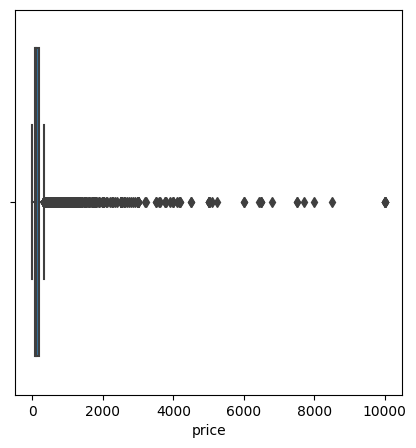

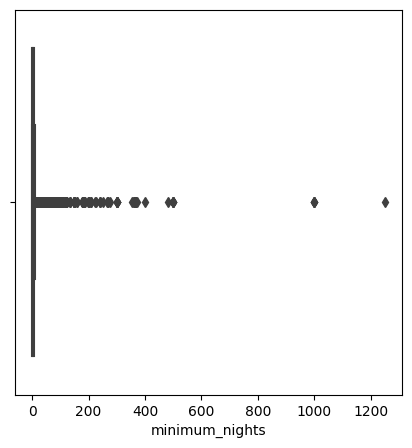

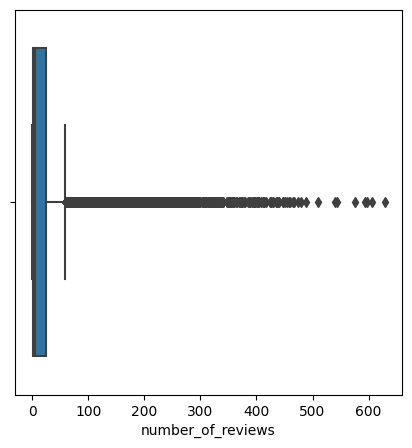

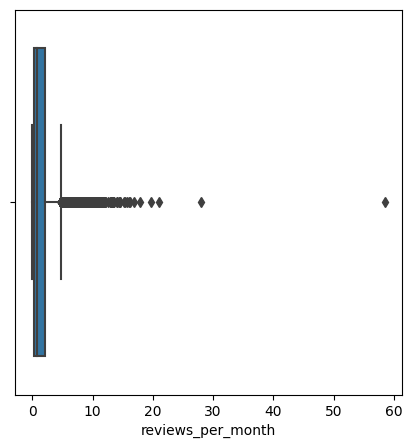

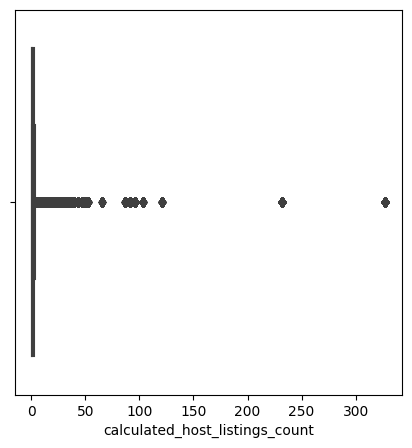

In [11]:
#menampilkan outlier
outlier_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df_airbnb[col])
    plt.show()

In [12]:
# menampilkan nilai z scored menggunakan outlier dengan tipe data numeric
df_numeric = df_airbnb.select_dtypes(include=[np.number])

for col in df_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(df_airbnb[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

latitude: 99
longitude: 1236
price: 388
minimum_nights: 327
number_of_reviews: 1221
calculated_host_listings_count: 680


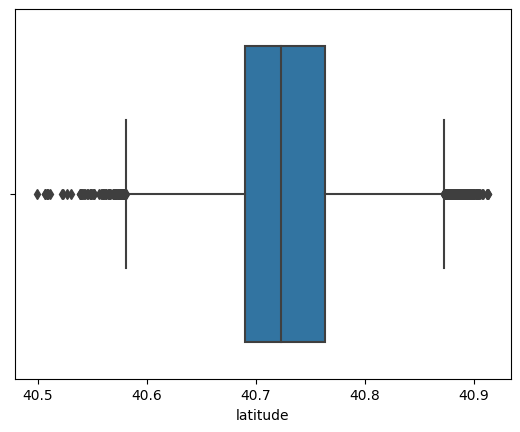

In [13]:
#menampilkan data outlier pada kolom latitude
sns.boxplot(x=df_airbnb['latitude']);

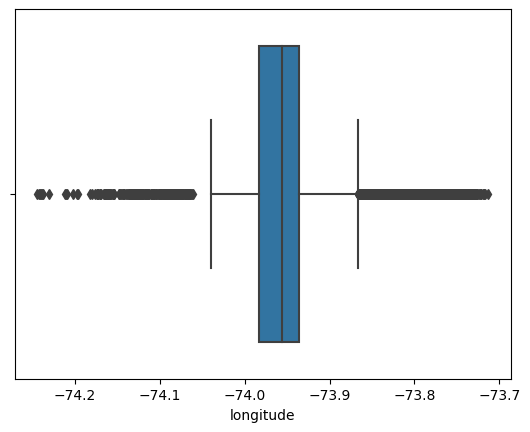

In [14]:
#menampilkan data outlier pada kolom longitude
sns.boxplot(x=df_airbnb['longitude']);

In [15]:
#mengetahui jumlah data kosong
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
#Menghapus data yang kosong NaN
df_airbnb = pd.read_csv('./airbnb.csv')
df_airbnb.dropna(inplace=True)
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,4.074.767,-73.975,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,4.078.099,-7.395.366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,4.075.104,-7.381.459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,4.054.179,-7.414.275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,4.080.787,-73.924,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [12]:
#Mengisi data kosong(Nan) menjadi
#Last_review =2019-09-17 & reviews_per_month=2.58
df_airbnb = pd.read_csv('./airbnb.csv')
df_airbnb['last_review'].fillna('2019-09-17', inplace=True)
df_airbnb['reviews_per_month'].fillna('2.58', inplace=True)
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,2019-09-17,2.58,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70,2,0,2019-09-17,2.58,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40,4,0,2019-09-17,2.58,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115,10,0,2019-09-17,2.58,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55,1,0,2019-09-17,2.58,6,2


In [13]:
#mengubah nilai kolom reviews_per_month yang kosong dengan nilai mean
df_airbnb = pd.read_csv('./airbnb.csv')

y = df_airbnb['reviews_per_month'].mean()

df_airbnb['reviews_per_month'].fillna(y, inplace=True)

df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70,2,0,NaN,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40,4,0,NaN,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115,10,0,NaN,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55,1,0,NaN,1.373221,6,2


In [14]:
#Mengubah nilai harga yg >150 menjadi 30
df_airbnb = pd.read_csv('./airbnb.csv')

for x in df_airbnb.index:
    if df_airbnb.loc[x, 'price'] > 150:
        df_airbnb.loc[x, 'price'] = 30

df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,30,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55,1,0,NaN,NaN,6,2


In [15]:
#Mengubah nilai harga yg >150 menjadi nilai rata"
df_airbnb = pd.read_csv('./airbnb.csv')
harga =df_airbnb.loc[df_airbnb['price'] <=150, 'price']
x = np.mean(harga)

df_airbnb.loc[df_airbnb['price'] >150, 'price'] = x

df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149.000000,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,86.162411,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150.000000,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89.000000,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80.000000,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70.000000,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40.000000,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115.000000,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55.000000,1,0,NaN,NaN,6,2


In [16]:
#menghapus name, host name, dan last review
df_airbnb.drop(columns = ['name','host_name','last_review'],inplace =True)
df_airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149.000000,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,86.162411,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,4.080.902,-739.419,Private room,150.000000,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89.000000,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80.000000,10,9,0.10,1,0


In [17]:
#menghapus nilai baris dari kolom 'availability_365'
df_airbnb = df_airbnb.drop(df_airbnb[df_airbnb['availability_365']==0].index,axis = 0)
df_airbnb = df_airbnb.reset_index()
df_airbnb

,index,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,2787,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149.000000,1,9,0.21,6,365
1,1,2595,2845,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,86.162411,1,45,0.38,2,355
2,2,3647,4632,Manhattan,Harlem,4.080.902,-739.419,Private room,150.000000,3,0,NaN,1,365
3,3,3831,4869,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89.000000,1,270,4.64,1,194
4,5,5099,7322,Manhattan,Murray Hill,4.074.767,-73.975,Entire home/apt,86.162411,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31357,48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,4.067.853,-7.394.995,Private room,70.000000,2,0,NaN,2,9
31358,48891,36485057,6570630,Brooklyn,Bushwick,4.070.184,-7.393.317,Private room,40.000000,4,0,NaN,2,36
31359,48892,36485431,23492952,Manhattan,Harlem,4.081.475,-7.394.867,Entire home/apt,115.000000,10,0,NaN,1,27
31360,48893,36485609,30985759,Manhattan,Hell's Kitchen,4.075.751,-7.399.112,Shared room,55.000000,1,0,NaN,6,2


In [18]:
#menampilkan nilai unik
df_airbnb.nunique()

index                             31362
id                                31362
host_id                           21809
neighbourhood_group                   5
neighbourhood                       218
latitude                          16038
longitude                         13367
room_type                             3
price                               140
minimum_nights                       99
number_of_reviews                   388
reviews_per_month                   929
calculated_host_listings_count       47
availability_365                    365
dtype: int64

In [19]:
#daftar nilai unik pada kolom neigbourhood_group
df_airbnb.neighbourhood_group.unique().tolist()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [20]:
#daftar nilai unik pada kolom room_type
df_airbnb.room_type.unique().tolist()

['Private room', 'Entire home/apt', 'Shared room']

VISUALISASI DATA

In [28]:
#mengetahui kolom dari dataset
df_airbnb.columns

Index(['index', 'id', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

C:\Users\Windows\AppData\Local\Temp\ipykernel_10320\379670729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_airbnb.corr(method = 'pearson')


<Axes: >

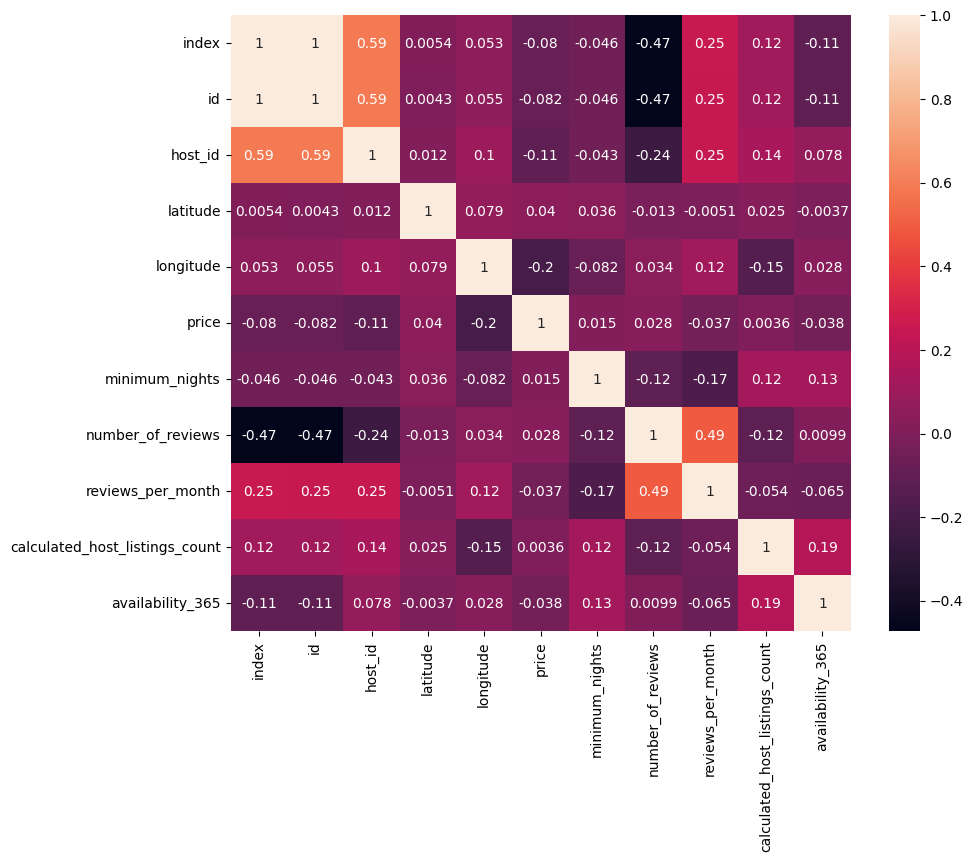

In [29]:
#menampilkan indeks korelasi pada metode peorson
corr = df_airbnb.corr(method = 'pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)

In [31]:
#menghitung value host id dengan menampilkan 15 baris
df_airbnb.host_id.value_counts().head(15)

219517861    327
107434423    232
30283594     121
12243051      96
137358866     92
16098958      92
61391963      86
22541573      85
200380610     65
1475015       52
7503643       50
120762452     50
205031545     49
2856748       49
190921808     47
Name: host_id, dtype: int64

In [32]:
#nilai maksimal pada calculated host listings count
df_airbnb.calculated_host_listings_count.max()

327

In [33]:
#eksplorasi neighbourhood_group
a = df_airbnb['neighbourhood_group'].value_counts().reset_index()
a.columns = ['neighbourhood_group','count']
a['per'] = a['count']/a['count'].sum() * 100
a

,neighbourhood_group,count,per
0,Manhattan,13559,43.233850
1,Brooklyn,12260,39.091895
2,Queens,4298,13.704483
3,Bronx,914,2.914355
4,Staten Island,331,1.055417


In [34]:
#normalisasi persentase antara 0 banding 1
df_airbnb.neighbourhood_group.value_counts(normalize = True).reset_index()

,index,neighbourhood_group
0,Manhattan,0.432338
1,Brooklyn,0.390919
2,Queens,0.137045
3,Bronx,0.029144
4,Staten Island,0.010554


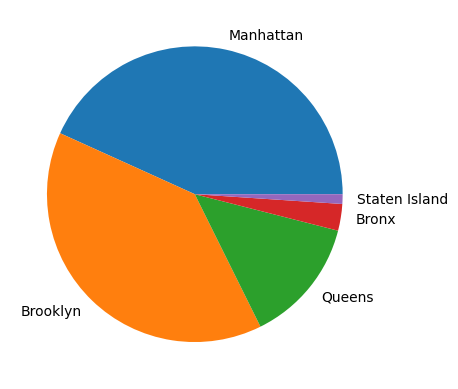

In [32]:
#menampilkan diagram pie chart pada label neigbourhood_group
labels = a.neighbourhood_group.tolist()
data = a.per.tolist()
explode = [0,0,0,0,0]
plt.pie(data, labels = labels,explode = explode)
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='count'>

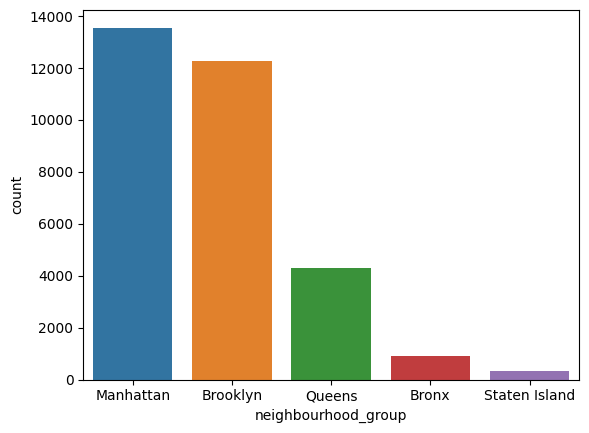

In [33]:
#menampilkan diagram batang dari neigbourhood_group
sns.barplot(data = a, x ='neighbourhood_group',y ='count')

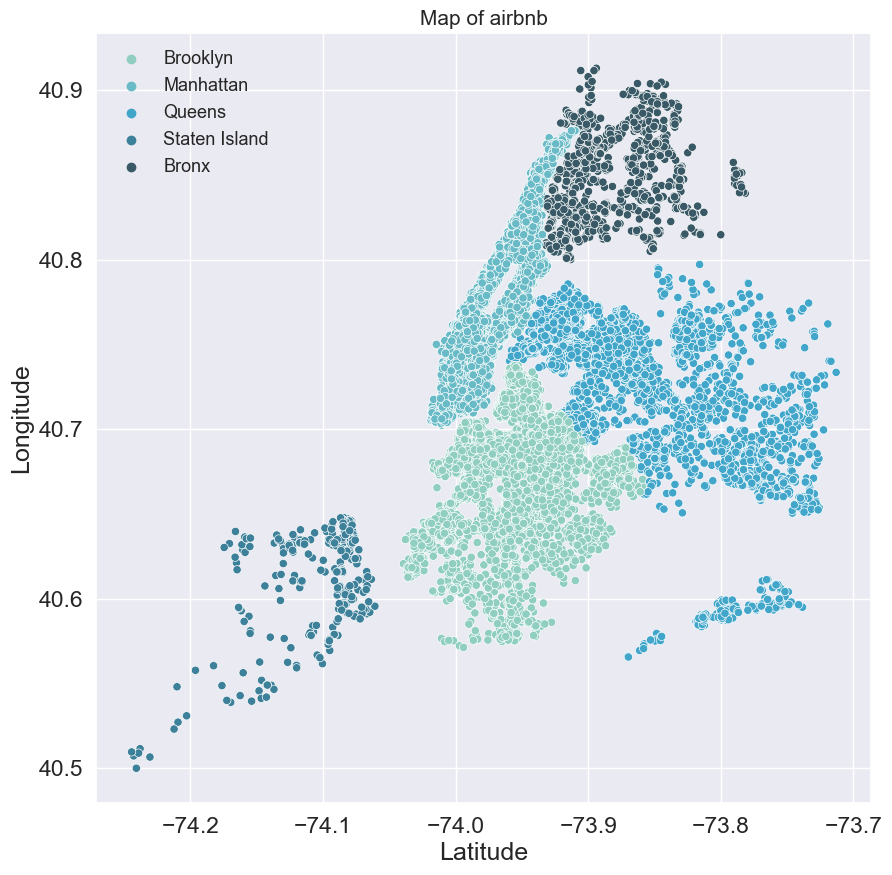

In [35]:
#menampilkan diagram sctatter plot dari penyebaran neigbourhood_group
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=df_airbnb, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)


In [24]:
#analisis dari neighbourhood
h = df_airbnb.neighbourhood.value_counts().reset_index()
h.columns = ['neighbourhood','counts']
h

,neighbourhood,counts
0,Bedford-Stuyvesant,2482
1,Williamsburg,2052
2,Harlem,1734
3,Bushwick,1449
4,Hell's Kitchen,1446
...,...,...
213,Rossville,1
214,Fort Wadsworth,1
215,Willowbrook,1
216,Silver Lake,1


<Axes: xlabel='neighbourhood', ylabel='count'>

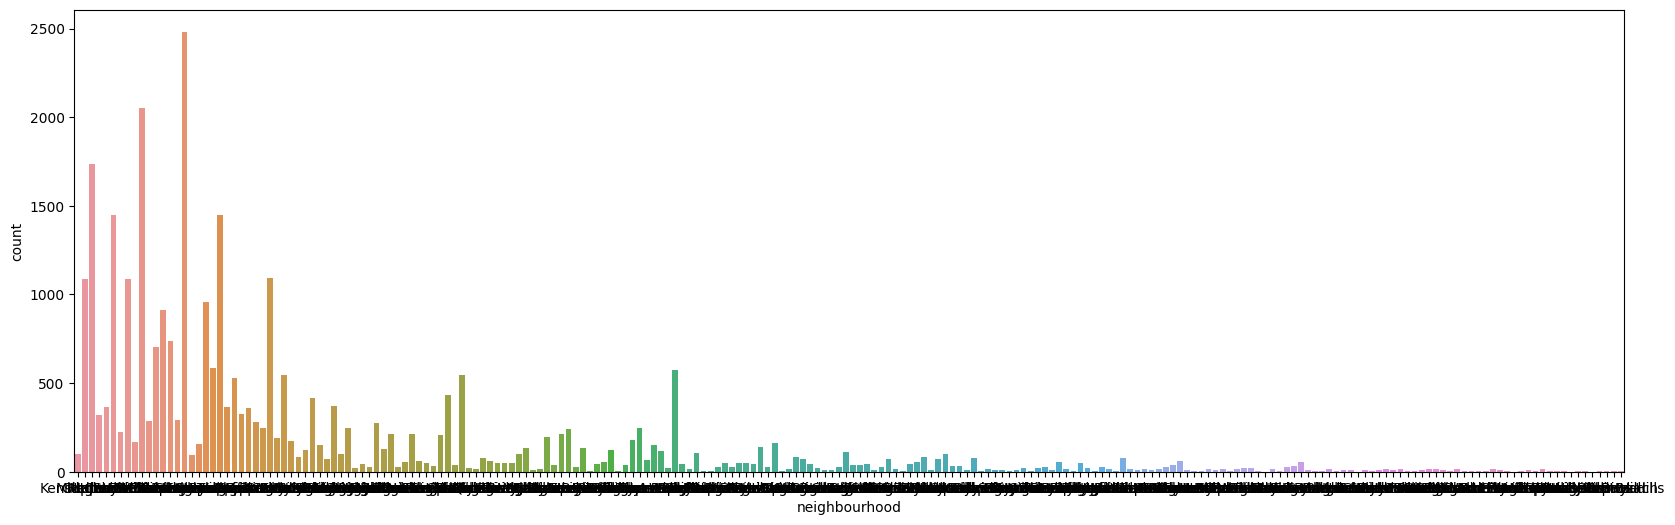

In [25]:
#visualisasi neighbourhood menggunakan countplot
plt.figure(figsize=(20,6))
sns.countplot(df_airbnb, x  = 'neighbourhood')

<Axes: xlabel='longitude', ylabel='latitude'>

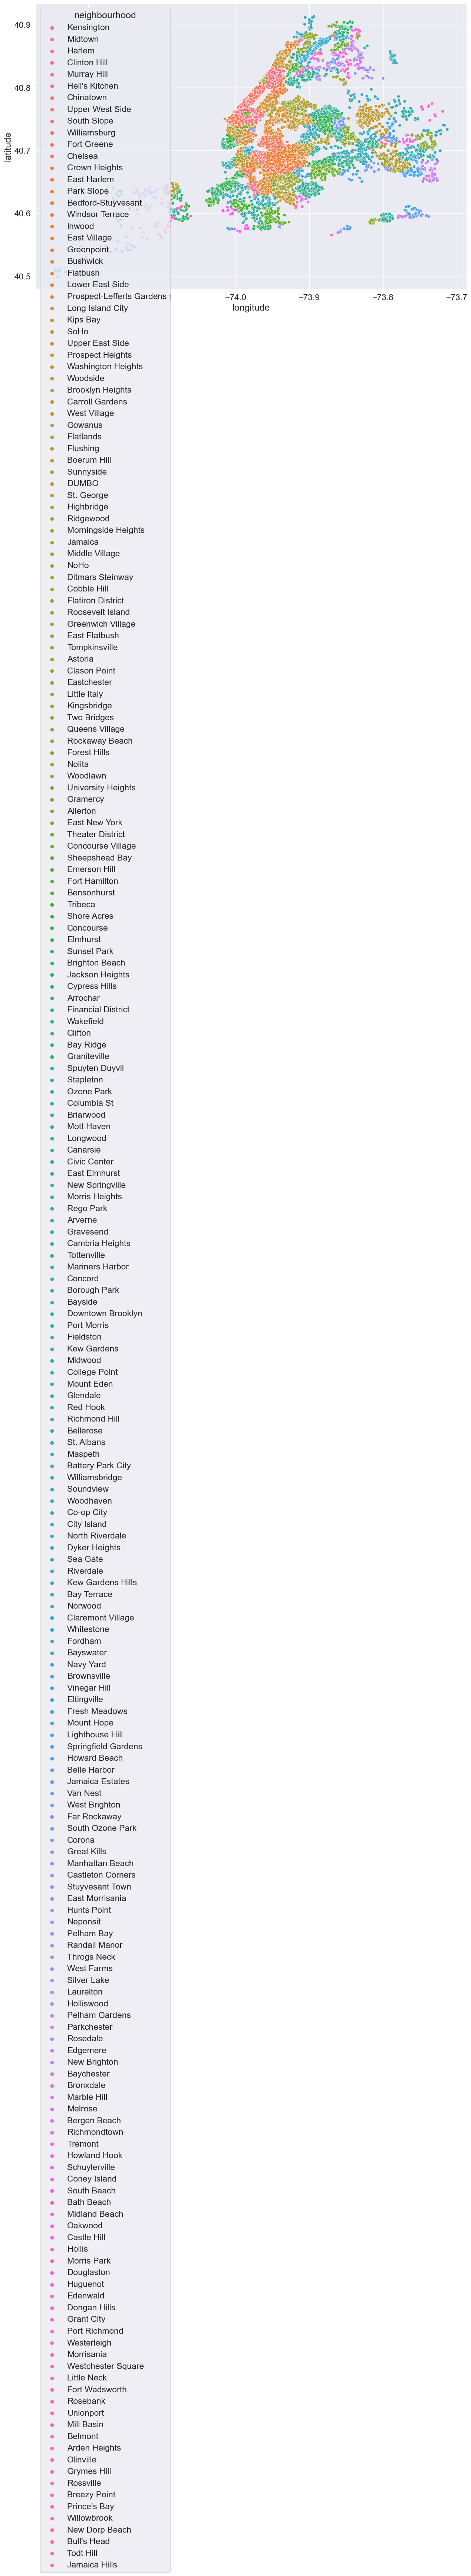

In [36]:
#menampilkan penyebaran neigbourhood pada diagram scatter plot
plt.figure(figsize = (15,10))
sns.scatterplot(x = df_airbnb.longitude,y = df_airbnb.latitude, hue = df_airbnb.neighbourhood)

In [44]:
#deskripsi dari number of review
df_airbnb.number_of_reviews.describe()

count    31362.000000
mean        31.852369
std         51.636804
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max        629.000000
Name: number_of_reviews, dtype: float64

<Axes: ylabel='Frequency'>

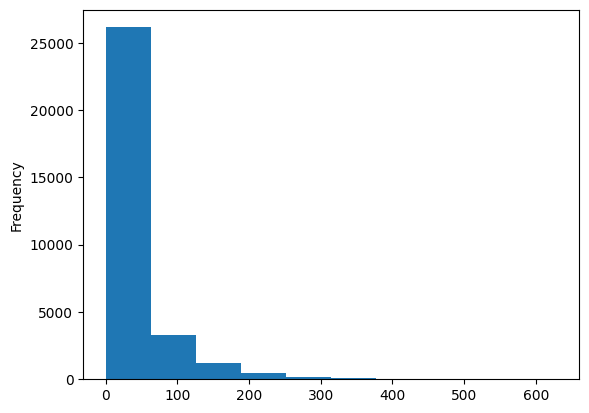

In [43]:
# visualisasi dengan histogram dari number of review
df_airbnb.number_of_reviews.plot.hist()

In [26]:
#analisis dari dari room type
b = df_airbnb['room_type'].value_counts().reset_index()
b.columns = ['room_type','counts']
b['per'] = b['counts']/b['counts'].sum()*100
b

,room_type,counts,per
0,Entire home/apt,16533,52.716663
1,Private room,13965,44.528410
2,Shared room,864,2.754926


<Axes: xlabel='room_type', ylabel='counts'>

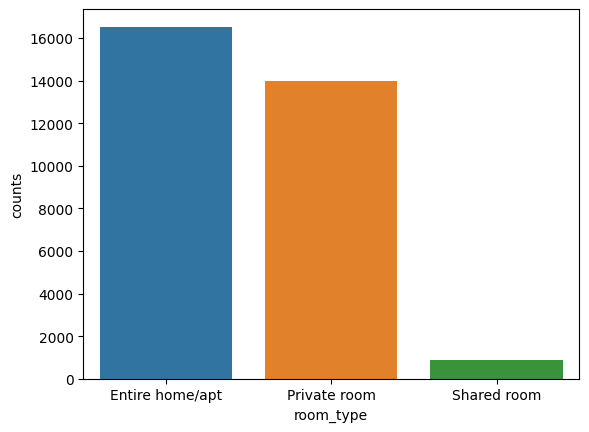

In [27]:
#visualisasi dengan barchart dari type room
sns.barplot(data = b, x ='room_type',y ='counts')

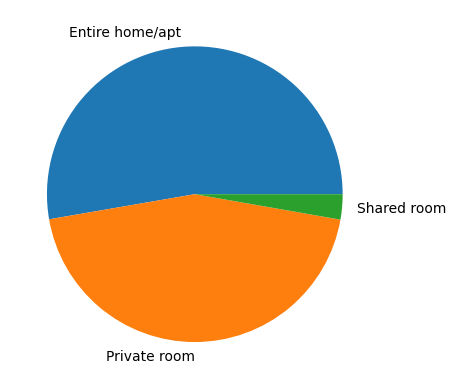

In [28]:
#visualisasi dengan pie chart dari type room
labels = b.room_type.tolist()
data = b.per.tolist()
explode = [0,0,0]
plt.pie(data,labels = labels,explode = explode,)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

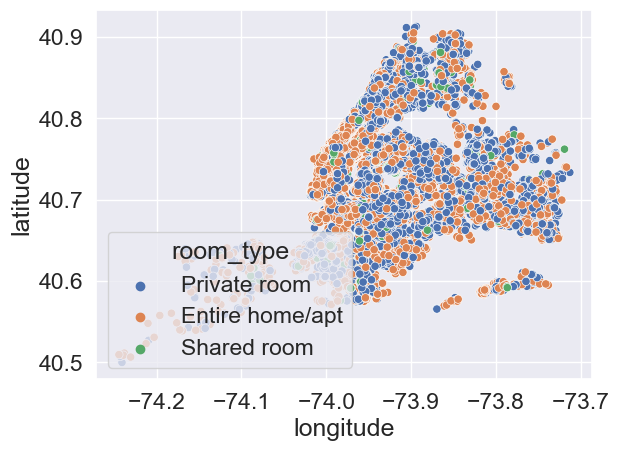

In [37]:
#menampilkan penyebaran room type dengan diagram neigbourhood
sns.scatterplot(x = df_airbnb.longitude,y = df_airbnb.latitude, hue = df_airbnb.room_type)

In [32]:
c = df_airbnb.price.describe()
c 

count    31362.000000
mean       162.050475
std        254.425463
min          0.000000
25%         70.000000
50%        111.500000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

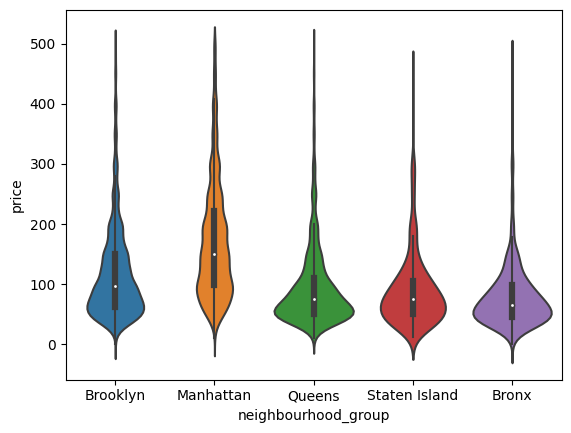

In [33]:
#memvisualisasikan dengan diagram violin dari tabel neigbourhood_group dan price
d = df_airbnb[df_airbnb.price < 500]
sns.violinplot(d,x='neighbourhood_group',y='price')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

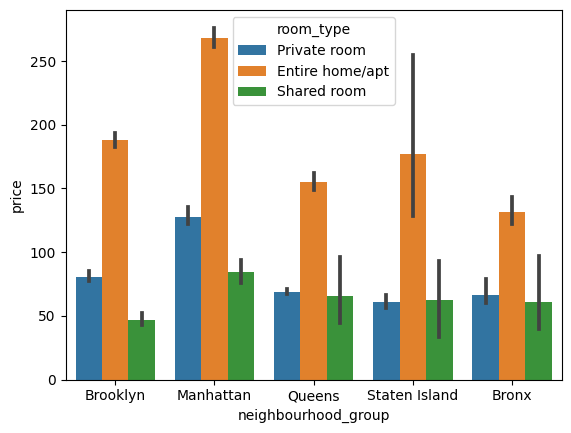

In [34]:
#visualisasi banyaknya tipe room dan harga di massing" wilayah
sns.barplot (df_airbnb,  x = 'neighbourhood_group' ,
              y = 'price' ,
              hue = 'room_type')

In [35]:
#perbandingan beberapa harga mulai dari termurah sampai termahal
label_name = ['Budget friendly','Average','Expensive','Exravagant']
range = [0,69, 106,175 ,np.inf]
df_airbnb['price_range'] = pd.cut(df_airbnb["price"],bins = range, labels = label_name)
price_group = df_airbnb.groupby(['price_range','neighbourhood_group'])['price_range'].count()

print(price_group)

price_range      neighbourhood_group
Budget friendly  Bronx                   475
                 Brooklyn               3653
                 Manhattan              1411
                 Queens                 1945
                 Staten Island           143
Average          Bronx                   259
                 Brooklyn               3216
                 Manhattan              2649
                 Queens                 1185
                 Staten Island           105
Expensive        Bronx                   125
                 Brooklyn               3117
                 Manhattan              3671
                 Queens                  717
                 Staten Island            48
Exravagant       Bronx                    54
                 Brooklyn               2267
                 Manhattan              5828
                 Queens                  451
                 Staten Island            35
Name: price_range, dtype: int64


<Axes: xlabel='neighbourhood_group', ylabel='count'>

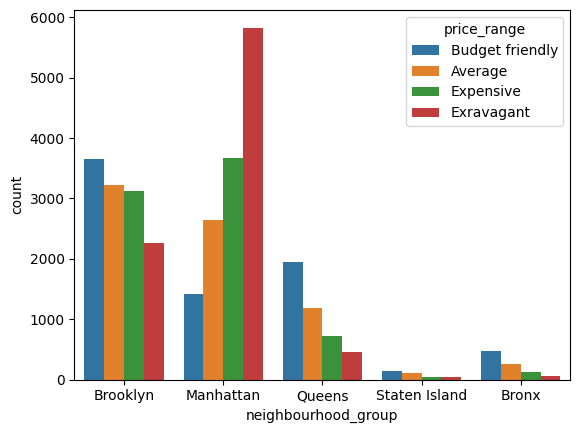

In [36]:
#sama seperti sebelumnya namun yang ini menampilkan data berupa diagram batang
sns.countplot(df_airbnb, x='neighbourhood_group', hue = 'price_range')

In [37]:
#deskripsi dari airbnb minimum night
df_airbnb.minimum_nights.describe()

count    31362.000000
mean         8.338658
std         23.836703
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4380\2072203511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_airbnb[(df_airbnb['minimum_nights']<=30) & (df_airbnb['minimum_nights'] > 0)]['minimum_nights'],bins = 31)


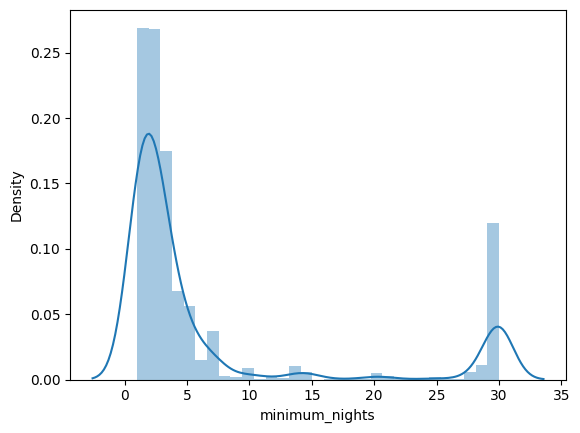

In [38]:
sns.distplot(df_airbnb[(df_airbnb['minimum_nights']<=30) & (df_airbnb['minimum_nights'] > 0)]['minimum_nights'],bins = 31)
plt.show()

<Axes: >

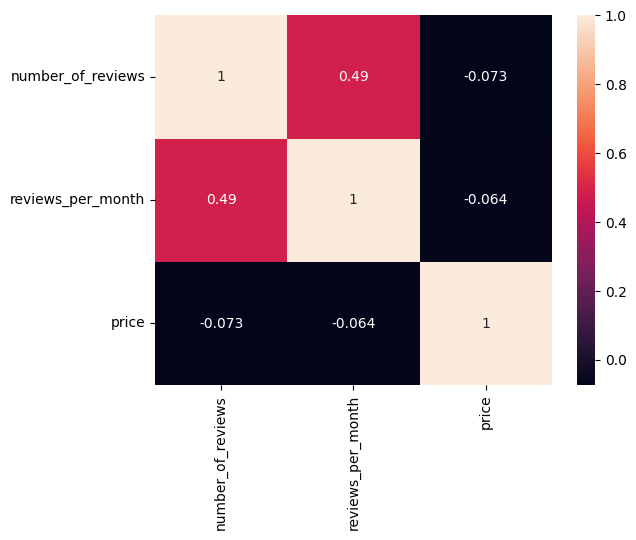

In [39]:
#menampilkan head map(correlation) pada nummber of review sampai price
df_airbnb_review = df_airbnb[['number_of_reviews', 'reviews_per_month', 'price']]
corr = df_airbnb_review.corr()
sns.heatmap(corr,annot=True)

In [40]:
review_for_20 = df_airbnb[(df_airbnb.number_of_reviews <= 30) & (df_airbnb.number_of_reviews > 1)]

In [42]:
k = df_airbnb['calculated_host_listings_count'].value_counts().reset_index()
k.columns = ['calculated_host_listings_count','count']
k

,calculated_host_listings_count,count
0,1,17393
1,2,4922
2,3,2402
3,4,1287
4,5,759
5,6,538
6,8,384
7,7,371
8,327,327
9,9,232


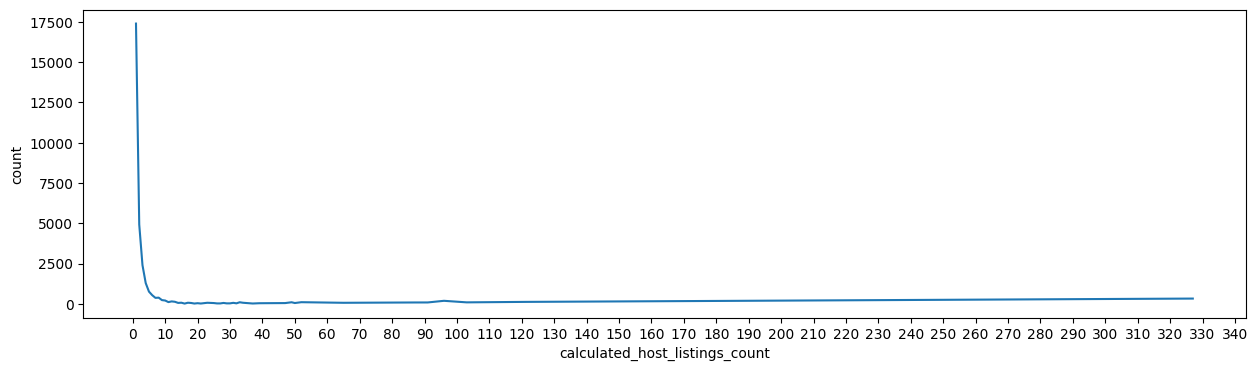

In [43]:
#visualisasikan ini dengan bantuan (lineplot)
plt.figure(figsize =(15,4))
sns.lineplot(k, x='calculated_host_listings_count', y = 'count')
t = plt.xticks(np.arange(0,350,10))

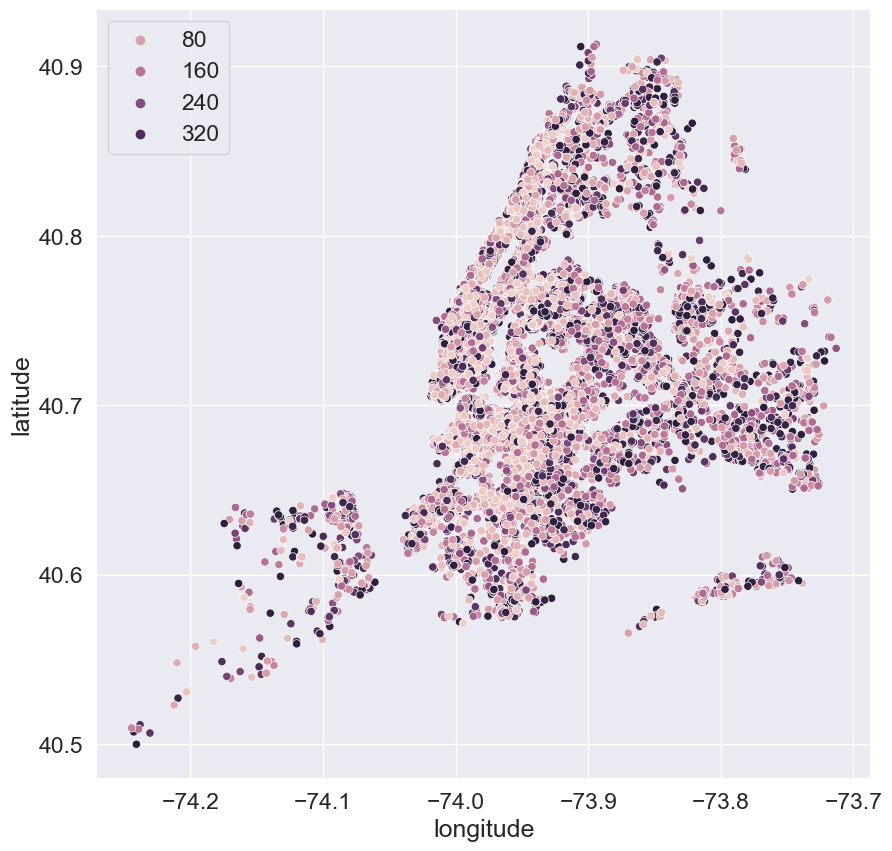

In [38]:
#penyebaran data longitude dan latitude dengan scatter plot
plt.figure(figsize = (10,10))
sns.scatterplot(x = df_airbnb.longitude,y = df_airbnb.latitude, hue = df_airbnb.availability_365)
plt.legend()
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

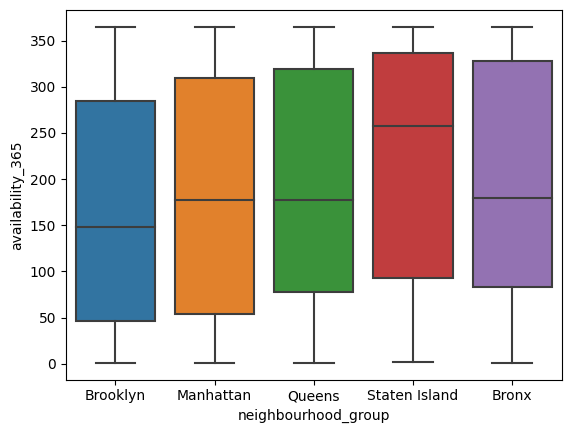

In [22]:
# visualisasi(perbandingan) dari neighbourhood_group availability_365 menggunakan boxplot
sns.boxplot(df_airbnb, x='neighbourhood_group',y='availability_365')

In [23]:
top_5_airbnb_best_review = df_airbnb.sort_values(by='number_of_reviews', ascending=False).head()

In [24]:
top_5_airbnb_best_review[['id', 'name', 'neighbourhood_group', 'neighbourhood', 'number_of_reviews']]

KeyError: "['name'] not in index"